# Pycaret Classification

https://www.youtube.com/watch?v=h7NodHiHejA&feature=emb_title

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install pycaret-nightly[full]

## Imports and Data Loading

In [ ]:
from pycaret.classification import *
from pycaret.datasets import get_data

diabetes = get_data('diabetes')
exp_clf = setup(diabetes, "Class variable")

## Finding Optimal Mode

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7764,0.8305,0.5927,0.7141,0.6429,0.4833,0.4910,0.393
catboost,CatBoost Classifier,0.7729,0.8418,0.6360,0.6826,0.6560,0.4875,0.4899,1.206
ridge,Ridge Classifier,0.7728,0.0000,0.5713,0.7197,0.6311,0.4712,0.4818,0.014
lda,Linear Discriminant Analysis,0.7728,0.8298,0.5822,0.7120,0.6347,0.4736,0.4825,0.016
rf,Random Forest Classifier,0.7635,0.8289,0.5544,0.7018,0.6158,0.4487,0.4579,0.453
gbc,Gradient Boosting Classifier,0.7635,0.8244,0.5980,0.6774,0.6324,0.4599,0.4636,0.107
et,Extra Trees Classifier,0.7635,0.8114,0.5544,0.7085,0.6145,0.4485,0.4607,0.453
lightgbm,Light Gradient Boosting Machine,0.7505,0.8078,0.6094,0.6478,0.6249,0.4392,0.4421,0.046
ada,Ada Boost Classifier,0.7486,0.8059,0.5985,0.6436,0.6163,0.4312,0.4346,0.087
xgboost,Extreme Gradient Boosting,0.7355,0.8051,0.5865,0.6250,0.6029,0.4055,0.4077,0.529


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5960, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
xgb = create_model("xgboost")

In [8]:
cat = create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.8889,0.7222,0.6500,0.6842,0.5135,0.5152
1,0.7963,0.8441,0.7222,0.6842,0.7027,0.5479,0.5484
2,0.6667,0.7423,0.5000,0.5000,0.5000,0.2500,0.2500
3,0.8148,0.8797,0.6842,0.7647,0.7222,0.5840,0.5860
4,0.8148,0.8617,0.7368,0.7368,0.7368,0.5940,0.5940
5,0.7407,0.8857,0.4737,0.6923,0.5625,0.3874,0.4014
6,0.7778,0.7970,0.6316,0.7059,0.6667,0.5008,0.5025
7,0.6792,0.7714,0.5000,0.5294,0.5143,0.2751,0.2754
8,0.8113,0.8810,0.6667,0.7500,0.7059,0.5677,0.5698
9,0.8491,0.8667,0.7222,0.8125,0.7647,0.6542,0.6566


## Visualizing Model Performance

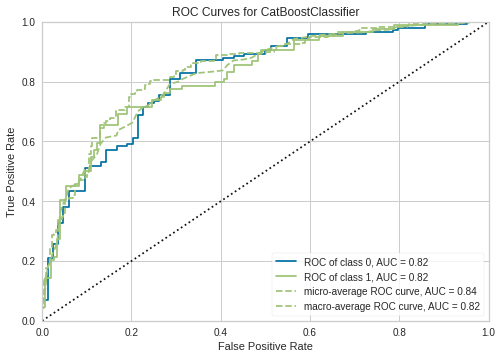

In [9]:
plot_model(cat)

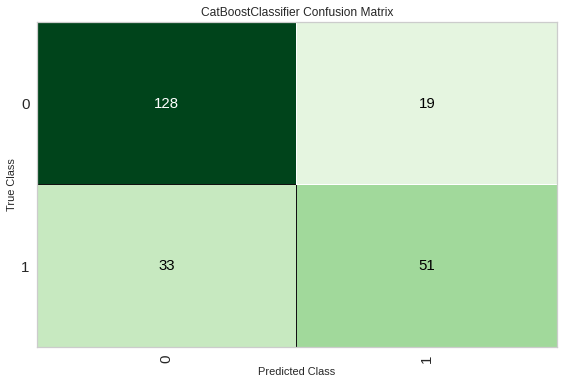

In [11]:
plot_model(cat,'confusion_matrix')

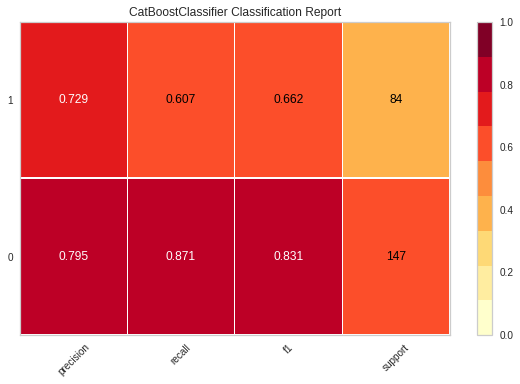

In [12]:
plot_model(cat, 'class_report')

<br><br>
## Model Interpretation with SHAP

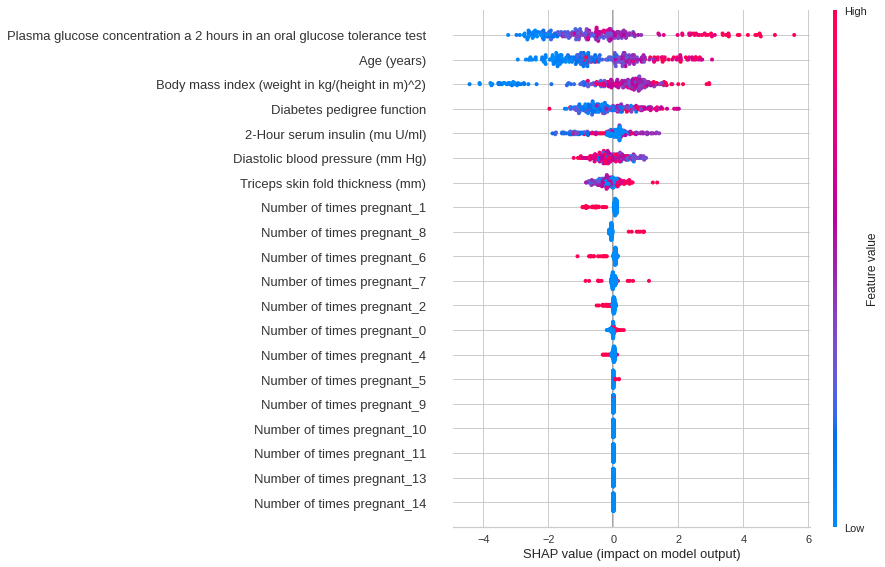

In [16]:
interpret_model(xgb)

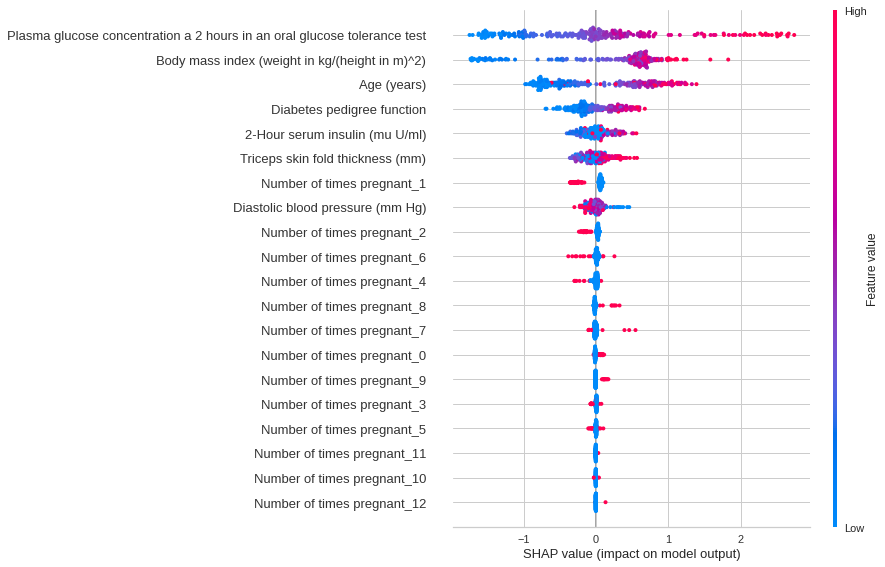

In [13]:
interpret_model(cat)

In [14]:
predictions = predict_model(cat)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7749,0.8179,0.6071,0.7286,0.6623,0.4956,0.5002


In [17]:
predictions = predict_model(xgb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7316,0.7847,0.5595,0.6528,0.6026,0.4018,0.4045


## Model Saving and Loading

In [18]:
finalize_model(cat)

In [ ]:
save_model(cat, 'diabetes_catboost')

In [21]:
finalize_model(xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=5960, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)

In [ ]:
save_model(xgb, 'diabetes_xgboost')

In [23]:
load_model('diabetes_catboost')

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Class variable',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeri...
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='Class variable')),
                ('fix_perfect', Remove_100(target='Class variable')),
                ('clean_names', Clean_Colum_Names()),
               